In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix , roc_curve , roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #converts into numerical all columns
import warnings
warnings.filterwarnings('ignore')

In [33]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv") #Reading the Data
data.head(8)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765


In [34]:
data.describe

<bound method NDFrame.describe of          rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]>

In [35]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [11]:
lab_enc=LabelEncoder()
#converts colum categorical inot numbers 

In [79]:
df1=lab_enc.fit_transform(data['rank'])
pd.Series(df1)

0      2
1      2
2      1
3      2
4      2
      ..
392    2
393    2
394    2
395    2
396    1
Length: 397, dtype: int32

In [80]:
data['rank'] = df1
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,Male,139750
1,2,B,20,16,Male,173200
2,1,B,4,3,Male,79750
3,2,B,45,39,Male,115000
4,2,B,40,41,Male,141500
...,...,...,...,...,...,...
392,2,A,33,30,Male,103106
393,2,A,31,19,Male,150564
394,2,A,42,25,Male,101738
395,2,A,25,15,Male,95329


In [81]:
df2=lab_enc.fit_transform(data['discipline'])
pd.Series(df2)

0      1
1      1
2      1
3      1
4      1
      ..
392    0
393    0
394    0
395    0
396    0
Length: 397, dtype: int32

In [82]:
data['discipline'] = df2
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,Male,139750
1,2,1,20,16,Male,173200
2,1,1,4,3,Male,79750
3,2,1,45,39,Male,115000
4,2,1,40,41,Male,141500
...,...,...,...,...,...,...
392,2,0,33,30,Male,103106
393,2,0,31,19,Male,150564
394,2,0,42,25,Male,101738
395,2,0,25,15,Male,95329


In [83]:
df3=lab_enc.fit_transform(data['sex'])
pd.Series(df3)

0      1
1      1
2      1
3      1
4      1
      ..
392    1
393    1
394    1
395    1
396    1
Length: 397, dtype: int32

In [84]:
data['sex'] = df3
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [85]:
data.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329
396,1,0,8,4,1,81035


In [86]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer #technique to fill nan
from sklearn.compose import make_column_transformer
import pandas as pd


In [30]:
ohe=OneHotEncoder()
si = SimpleImputer()

In [87]:
data.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [88]:
data.isnull().tail

<bound method NDFrame.tail of       rank  discipline  yrs.since.phd  yrs.service    sex  salary
0    False       False          False        False  False   False
1    False       False          False        False  False   False
2    False       False          False        False  False   False
3    False       False          False        False  False   False
4    False       False          False        False  False   False
..     ...         ...            ...          ...    ...     ...
392  False       False          False        False  False   False
393  False       False          False        False  False   False
394  False       False          False        False  False   False
395  False       False          False        False  False   False
396  False       False          False        False  False   False

[397 rows x 6 columns]>

In [89]:
data.isnull().head

<bound method NDFrame.head of       rank  discipline  yrs.since.phd  yrs.service    sex  salary
0    False       False          False        False  False   False
1    False       False          False        False  False   False
2    False       False          False        False  False   False
3    False       False          False        False  False   False
4    False       False          False        False  False   False
..     ...         ...            ...          ...    ...     ...
392  False       False          False        False  False   False
393  False       False          False        False  False   False
394  False       False          False        False  False   False
395  False       False          False        False  False   False
396  False       False          False        False  False   False

[397 rows x 6 columns]>

In [90]:
# using notnull() function
data.notnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
392,True,True,True,True,True,True
393,True,True,True,True,True,True
394,True,True,True,True,True,True
395,True,True,True,True,True,True


In [91]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [126]:
data.drop('discipline', axis=1,inplace=True)

KeyError: "['discipline'] not found in axis"

In [127]:
data.head()

,yrs.since.phd,yrs.service,sex,salary
0,19,18,1,139750
1,20,16,1,173200
2,4,3,1,79750
3,45,39,1,115000
4,40,41,1,141500


In [128]:
X = data.drop(columns =['salary'])
y = data['salary']

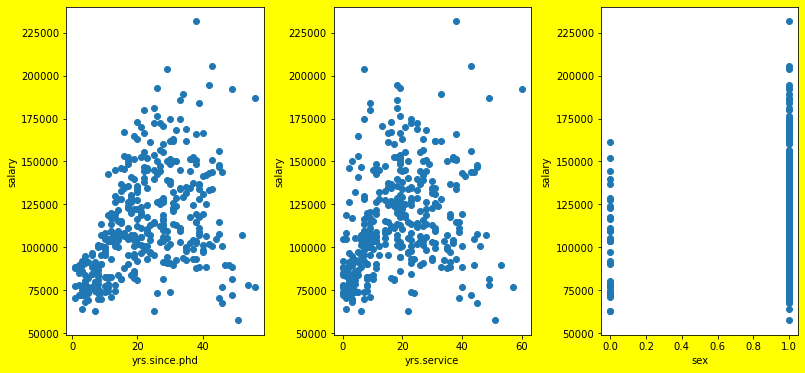

In [129]:
# Visualizing relationship
plt.figure(figsize = (15,10 ), facecolor = 'yellow') 
plotnumber = 1 
for column in X :
    if plotnumber <= 6:
        ax = plt.subplot (2,4 , plotnumber) 
        plt.scatter(X[column] , y) #scatter plot
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('salary' , fontsize = 10)
    plotnumber += 1 #even if straight line format, it is still showng a positive relation with x and y
plt.tight_layout()

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [131]:
X_scaled

array([[-0.25754973,  0.02966908,  0.3300584 ],
       [-0.17985426, -0.12429986,  0.3300584 ],
       [-1.42298184, -1.12509795,  0.3300584 ],
       ...,
       [ 1.52944617,  0.56856036,  0.3300584 ],
       [ 0.20862311, -0.20128433,  0.3300584 ],
       [-1.11219995, -1.04811348,  0.3300584 ]])

In [137]:
#Split data into train and test .
#Model will be built on training data and tested on test data . 
x_train,x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 50)
y_train.head() #random state can be any randon number like seed in numpy

319    135027
159    137167
161    176500
338    128464
107     82600
Name: salary, dtype: int64

In [138]:
#Model instantiating and training
regression = LinearRegression() #model is train , when u we use 'fit'
regression.fit(x_train , y_train)

LinearRegression()

In [139]:
#Predict the chance of admission given features
data.tail(2)

,yrs.since.phd,yrs.service,sex,salary
395,25,15,1,95329
396,8,4,1,81035


In [140]:
print('salary prediction: ', regression.predict (scaler.transform([[ 25.0 , 15.0 , 1.0]]))) 

salary prediction:  [121032.74174779]


In [142]:
import pickle
filename = 'finalized_model.pickle' 
pickle.dump(regression , open(filename , 'wb'))
# prediction using the saved model 
loaded_model = pickle.load(open(filename , 'rb')) 
a = loaded_model.predict(scaler.transform([[8,4,1]])) 
a

array([100862.10231773])

In [143]:
# Adjusted R2 score
regression.score(x_train , y_train)
#able to understand 81% of the model.

0.20532683247964323

In [144]:
#lets check how well if model fits test data. if u give less data model cannot understand
#it is only on 25% of our data
regression.score(x_test , y_test)

0.15414075596296906

In [145]:
 #Let's plot and visualize
y_pred = regression.predict(x_test)
y_pred 

array([120440.44366302,  86861.41567095, 104718.54077831, 124334.71336761,
       122998.79222208, 118884.03596311, 142425.80859138, 100528.12203135,
       107276.88933737, 105386.50135107, 117623.77730558, 114731.44846015,
       116174.36242806, 109910.90038442,  99267.86337382, 107535.20713575,
       127409.69752343, 119848.14557826, 106942.90905099, 108240.99895251,
       132381.57057515, 124555.19992199,  92349.92431944, 100528.12203135,
       123666.75279484, 108908.95952528, 141833.51050662, 100565.95327535,
       124076.39556922, 100875.58587976, 126893.06192666, 117561.59837962,
       118921.86720711, 129193.09268733, 127264.87345704, 107648.70086775,
       108240.99895251,  86861.41567095, 131266.13598401,  95115.27587085,
       120106.46337664, 129634.0657961 , 124038.56432522, 115027.59750253,
        92556.9273118 , 121480.21576617, 139798.29845393, 135198.23693259,
        94781.29558447, 128859.11240095, 112803.22922986, 105682.65039346,
       127895.00278581, 1

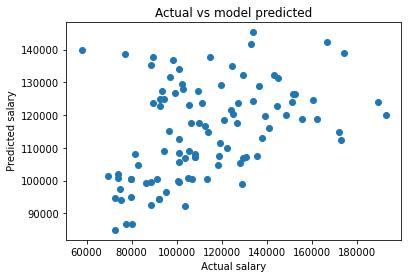

In [146]:
plt.scatter(y_test , y_pred)
plt.xlabel(' Actual salary ')
plt.ylabel (' Predicted salary')
plt.title('Actual vs model predicted') 
plt.show() #compare actual and predicted y_test is actual label and y_pred is predicted as solved above

In [147]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [148]:
y_pred = regression.predict(x_test)
mean_absolute_error(y_test , y_pred) #actual vs predicted


20197.162352032457

In [149]:
mean_squared_error(y_test , y_pred) 

683681155.51224

In [150]:
np.sqrt(mean_squared_error(y_test , y_pred))

26147.2972888641

In [151]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividing by the L2-norm
lasscv = LassoCV (alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)
#100 times it is trained

LassoCV(max_iter=100, normalize=True)

In [160]:
# best alpha parameter
alpha= lasscv.alpha_
alpha

88.75947396519966

In [153]:
#now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=88.75947396519966)

In [154]:
lasso_reg.score(x_test, y_test)

0.15434718231245448

In [156]:
#ridgecv.alpha_
#RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange (0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train, y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [161]:
ridgecv.alpha_

0.011

In [162]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.011)

In [163]:
ridge_model.score(x_test, y_test)

0.15414444919474524